In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

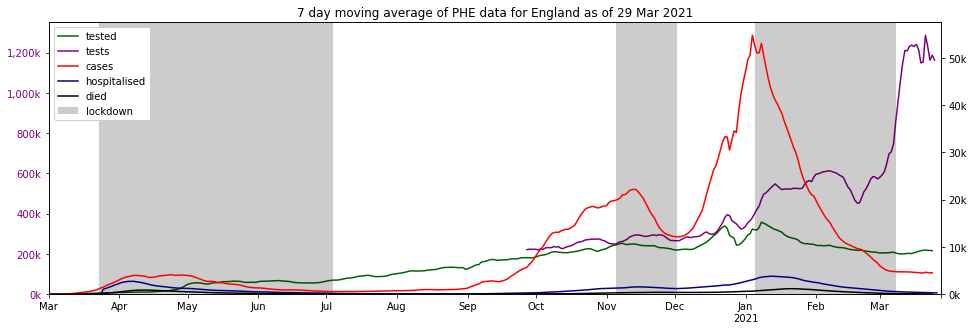

In [2]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

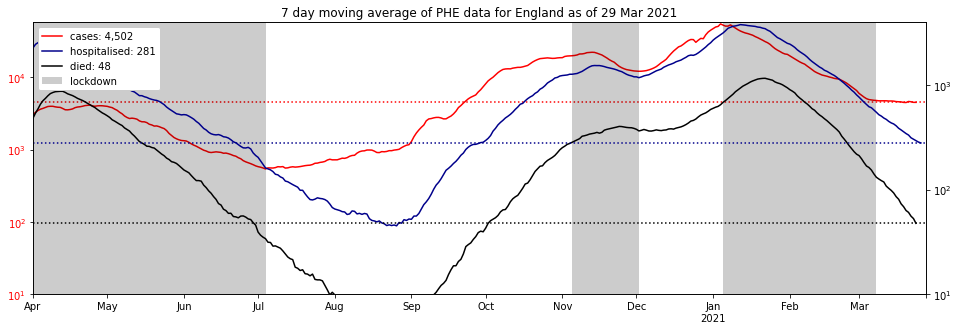

In [18]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

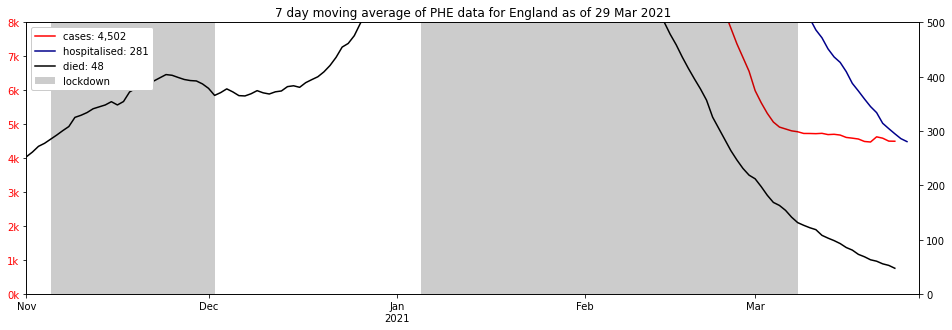

In [4]:
plot_summary(earliest_date='2020-11-01', show_latest=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=8_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=500)

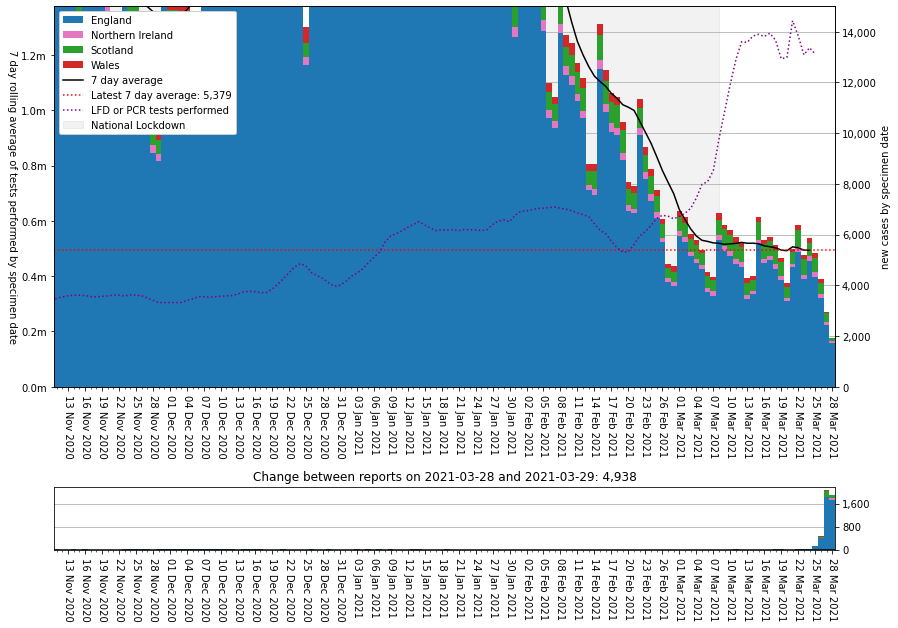

In [5]:
plot_areas(for_date, 'cases_nations', ylim=15_000, earliest='2020-11-11')

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,2806124.0,25903782.0,23097658.0,56286961,4.985389,41.035539,53.979072
1,Northern Ireland,N92000002,125017.0,730471.0,605454.0,1893667,6.601847,31.972570,61.425583
2,Scotland,S92000003,326263.0,2409826.0,2083563.0,5463300,5.971903,38.137444,55.890652
3,Wales,W92000004,416862.0,1400750.0,983888.0,3152879,13.221630,31.206018,55.572351


'partial: 30,444,829 (45.6%), full: 3,674,266'

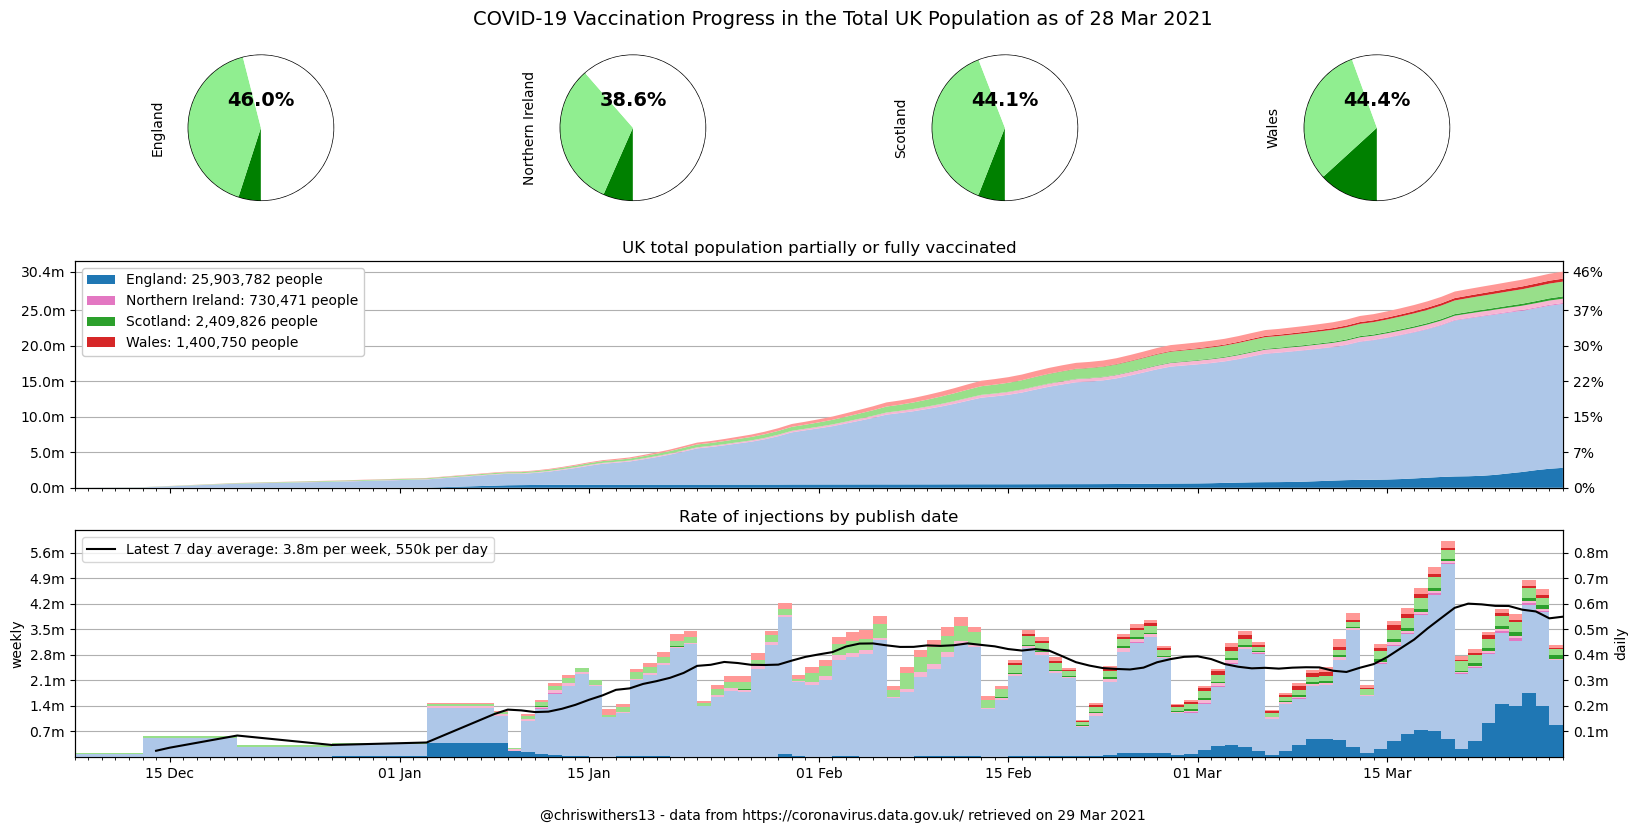

In [6]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

In [7]:
vaccination_changes()

,,First Dose (New),Second Dose (New),Complete (New),First Dose (Total),Second Dose (Total),Complete (Total)
,,,,,,,
England,28 Mar 21,"+252,376","+127,078","+127,078","+25,903,782","+2,806,124","+2,806,124"
Northern Ireland,28 Mar 21,"+3,882","+1,565","+1,565","+730,471","+125,017","+125,017"
Scotland,28 Mar 21,"+24,117","+13,943","+13,943","+2,409,826","+326,263","+326,263"
Wales,28 Mar 21,"+13,167","+4,199","+4,199","+1,400,750","+416,862","+416,862"


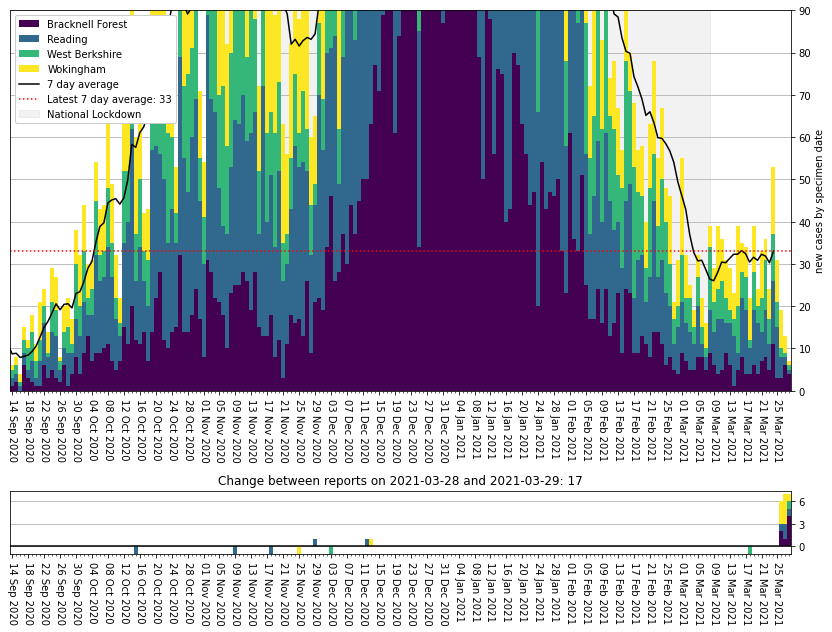

In [8]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=90)

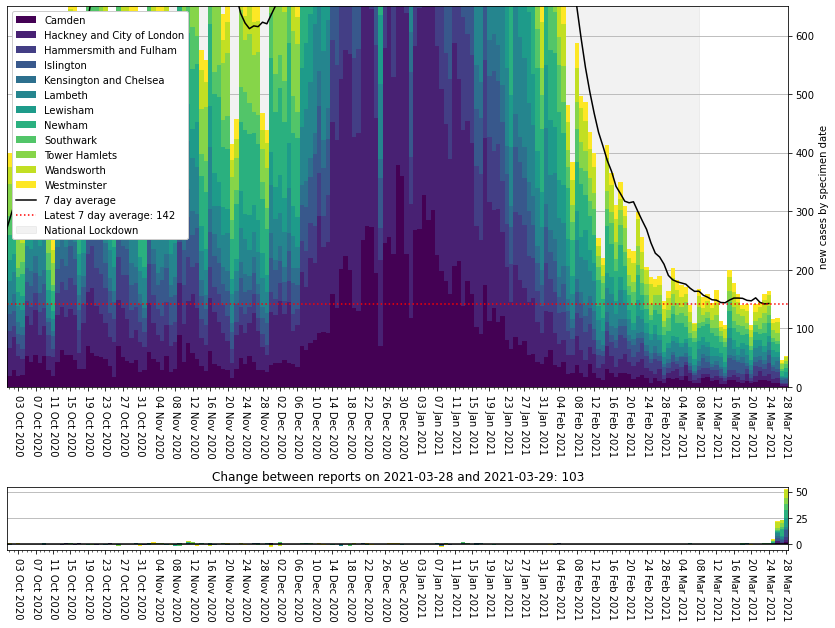

In [9]:
plot_areas(for_date, areas=london_areas, ylim=650)

In [10]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [11]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000150,Corby,207.704450,150.0,2021-03-28
E07000218,North Warwickshire,157.820544,103.0,2021-03-28
E08000018,Rotherham,157.114814,417.0,2021-03-28
S12000005,Clackmannanshire,135.816841,70.0,2021-03-28
E08000016,Barnsley,131.650369,325.0,2021-03-28
S12000040,West Lothian,131.622064,241.0,2021-03-28
S12000050,North Lanarkshire,127.134780,434.0,2021-03-28
E06000013,North Lincolnshire,126.529380,218.0,2021-03-28
E08000036,Wakefield,125.462229,437.0,2021-03-28


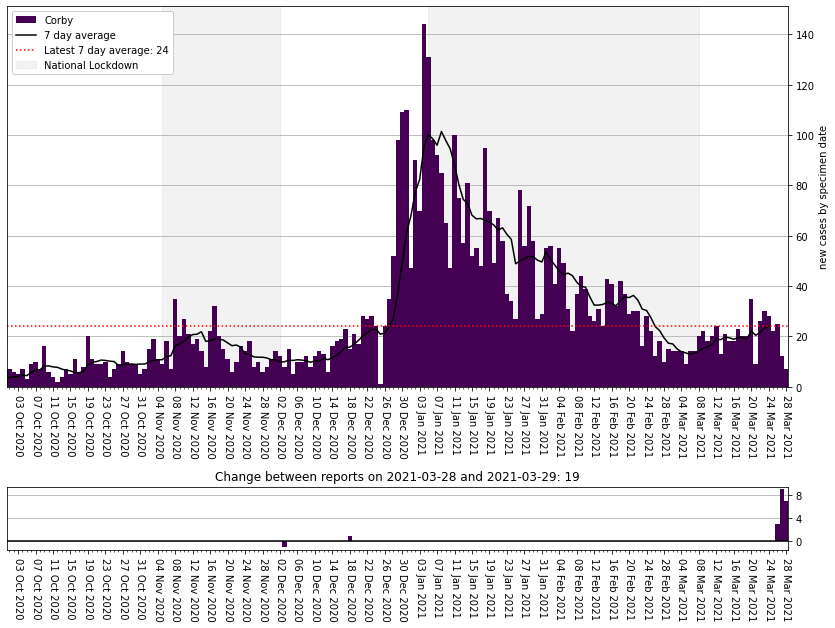

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [13]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000035,Leeds,107.925597,856.0,2021-03-28
E08000025,Birmingham,62.531967,714.0,2021-03-28
E08000032,Bradford,122.828729,663.0,2021-03-28
E08000019,Sheffield,109.429207,640.0,2021-03-28
S12000049,Glasgow City,83.870356,531.0,2021-03-28
E08000003,Manchester,84.651032,468.0,2021-03-28
E08000036,Wakefield,125.462229,437.0,2021-03-28
S12000050,North Lanarkshire,127.134780,434.0,2021-03-28
E08000018,Rotherham,157.114814,417.0,2021-03-28


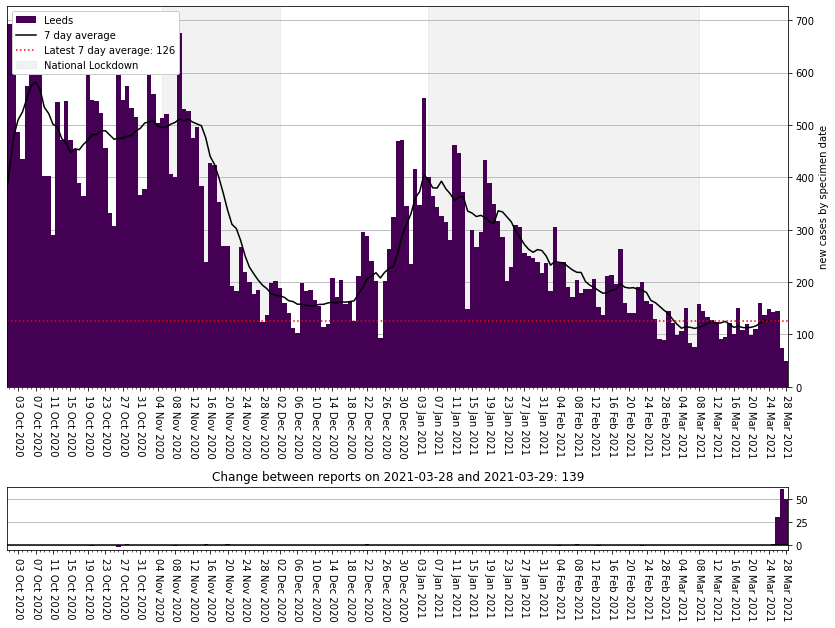

In [14]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [15]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.0
phe_max = 0.25

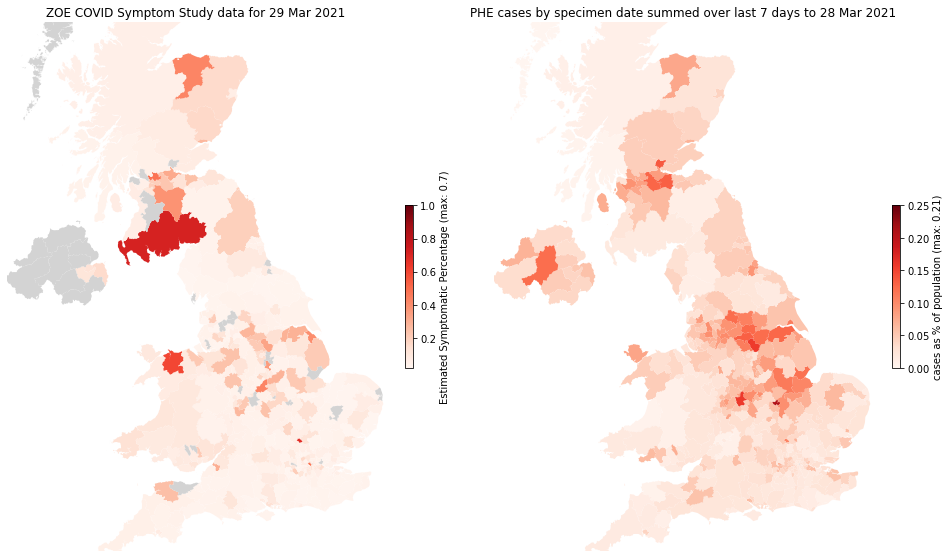

In [16]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [17]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...